# Exploration & Feature Selection
- Target & features:
    - Y = 		Churn +
    - X = 
        - Tenure +
        - Contract type 
        - Monthly charges +
        - Internet service type +
        - Phone service type + 
        - Online security +
        - ONline backup
        - Senior +
        - Bool calculated field: paying more than x% of customers(to be

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from prepare import prep_data, split_data

As a customer myself, the first thing I care the most is the price, If there is a better deal in other company, I would like to churn. 
Also I swithched from Att to Tmobile because the data of my att plan was too little, eventhough it is cheap, but I need more data.

In [2]:
df = prep_data()

In [3]:
df.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,churn,internet_service
0,0,1,1,9,1,0,1,0,1,0,1,1,0,2,1,2,65.6,0,1
1,0,0,0,9,1,1,1,0,0,0,0,0,1,1,0,2,59.9,0,1
2,0,0,0,4,1,0,2,0,0,1,0,0,0,1,1,1,73.9,1,1
3,1,1,0,13,1,0,2,0,1,1,0,1,1,1,1,1,98.0,1,1
4,1,1,0,3,1,0,2,0,0,0,1,1,0,1,1,2,83.9,1,1


In [4]:
train, validate, test = split_data(df, .8)
train.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,churn,internet_service
3221,1,1,0,20,1,0,2,0,0,0,0,1,1,2,1,3,91.00,0,1
3076,0,0,0,54,1,0,2,1,0,1,0,1,0,1,0,2,89.80,0,1
4825,0,0,0,12,1,0,1,0,1,0,0,0,0,1,1,1,49.40,0,1
5571,0,0,0,1,0,No phone service,1,0,1,0,1,0,1,1,1,2,44.65,1,1
6967,0,1,1,35,0,No phone service,1,1,0,0,1,1,0,3,1,4,46.35,0,1


## 1. Churn vs Tenure

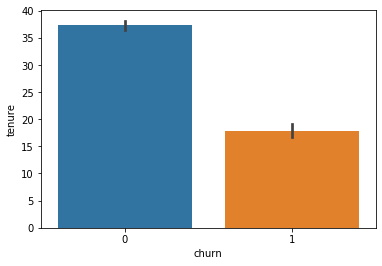

In [5]:
x1 = train[train.churn == 0].tenure.mean()
x2 = train[train.churn == 1].tenure.mean()
sns.barplot(train.churn,train.tenure)

**Question**: is there any difference in the tenure for those who churned and  who didn't.
- H0: No difference
- Ha: There is a difference  
- CI: 0.05

Test: ttest_ind

In [6]:
x1 = train[train.churn == 0].tenure
x2 = train[train.churn == 1].tenure
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=25.26428329436042, pvalue=8.291313114859351e-132)

Because p < 0.05, the difference is significant

## 2. Churn vs Monthly_charges

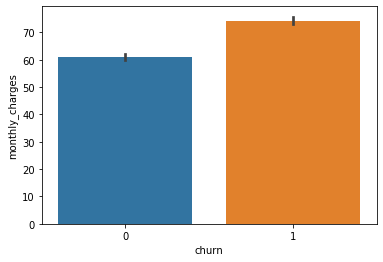

In [7]:
sns.barplot(train.churn,train.monthly_charges)

**Question**: is there any difference in the monthly charges for those who churned and  who didn't.
- H0: No difference
- Ha: There is a difference  
- CI: 0.05

Test: ttest_ind

In [8]:
x1 = train[train.churn == 0].monthly_charges
x2 = train[train.churn == 1].monthly_charges
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=-13.682718717016746, pvalue=8.749441401355314e-42)

Because p < 0.05, the difference is significant

## 3. Churn vs Service type

In [ ]:
def service_type():
    if 

## 4. monthly charges vs senior multiline are they correlated?

In [10]:
train.multiple_lines.value_counts()

0                   2210
1                   1868
No phone service     422
Name: multiple_lines, dtype: int64

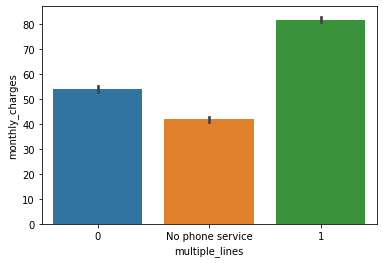

In [12]:
sns.barplot(train.multiple_lines,train.monthly_charges)

In [11]:
x1 = train[train.multiple_lines == 0].monthly_charges
x2 = train[train.multiple_lines == 1].monthly_charges
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=-32.678851003505926, pvalue=3.0172653107690554e-208)

So monthly charges are correlated with the muli_line